In [2]:
import pandas as pd
dff = pd.read_pickle("./output.pkl")
types = dff.dtypes
types.to_excel('types.xlsx')

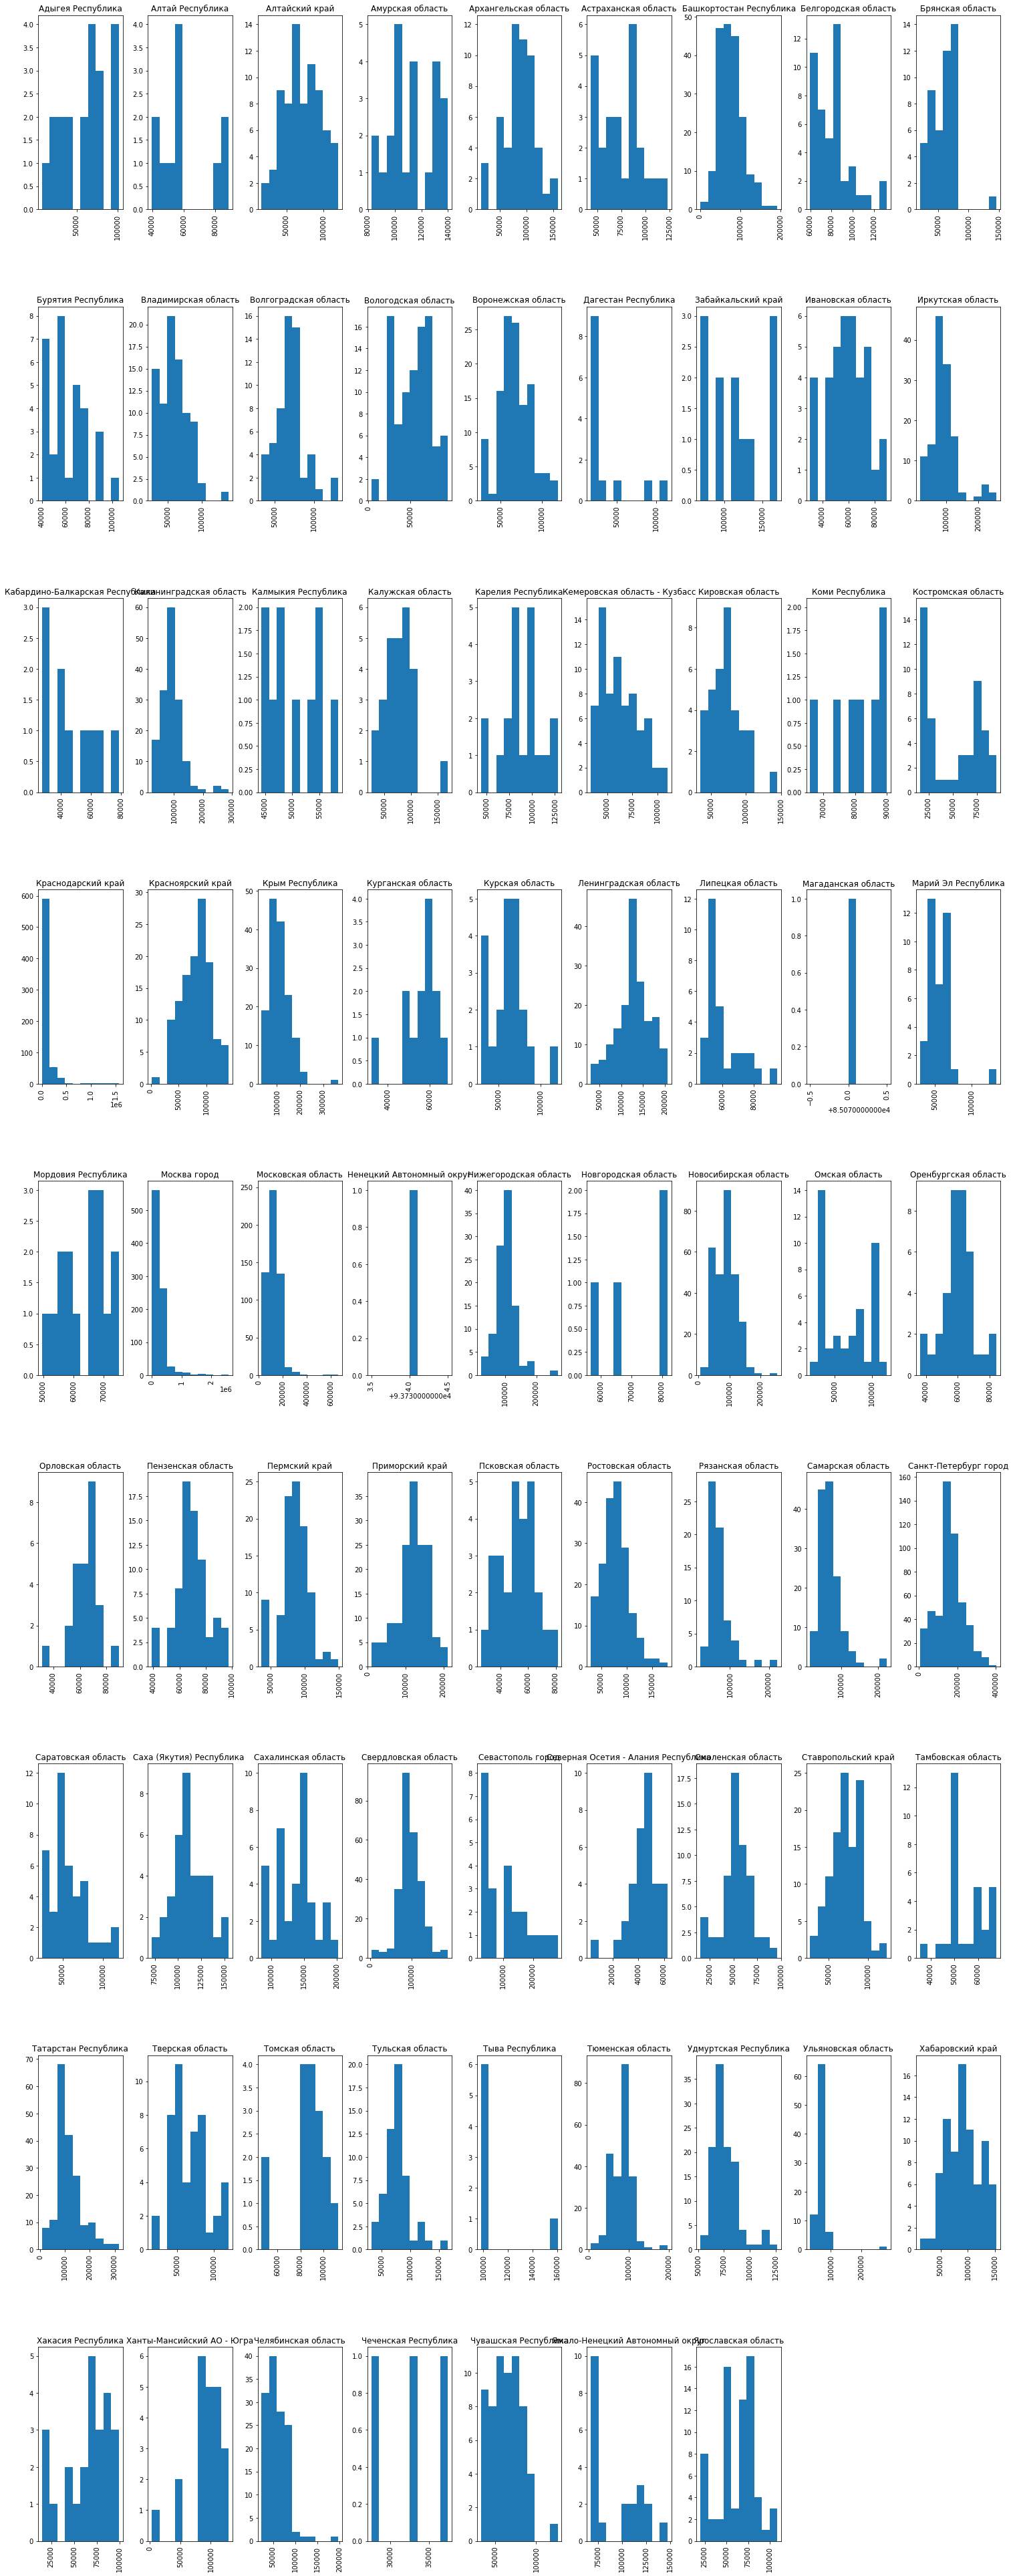

In [3]:
dff_copy = dff.dropna(subset=['data.objPriceAvg'])

hists = dff_copy['data.objPriceAvg'].hist(by=dff_copy['data.developer.regRegionDesc'], figsize=(25, 70), color = "tab:blue", grid = True)
#Картина по стоимости жилья в разрезе регионов. 

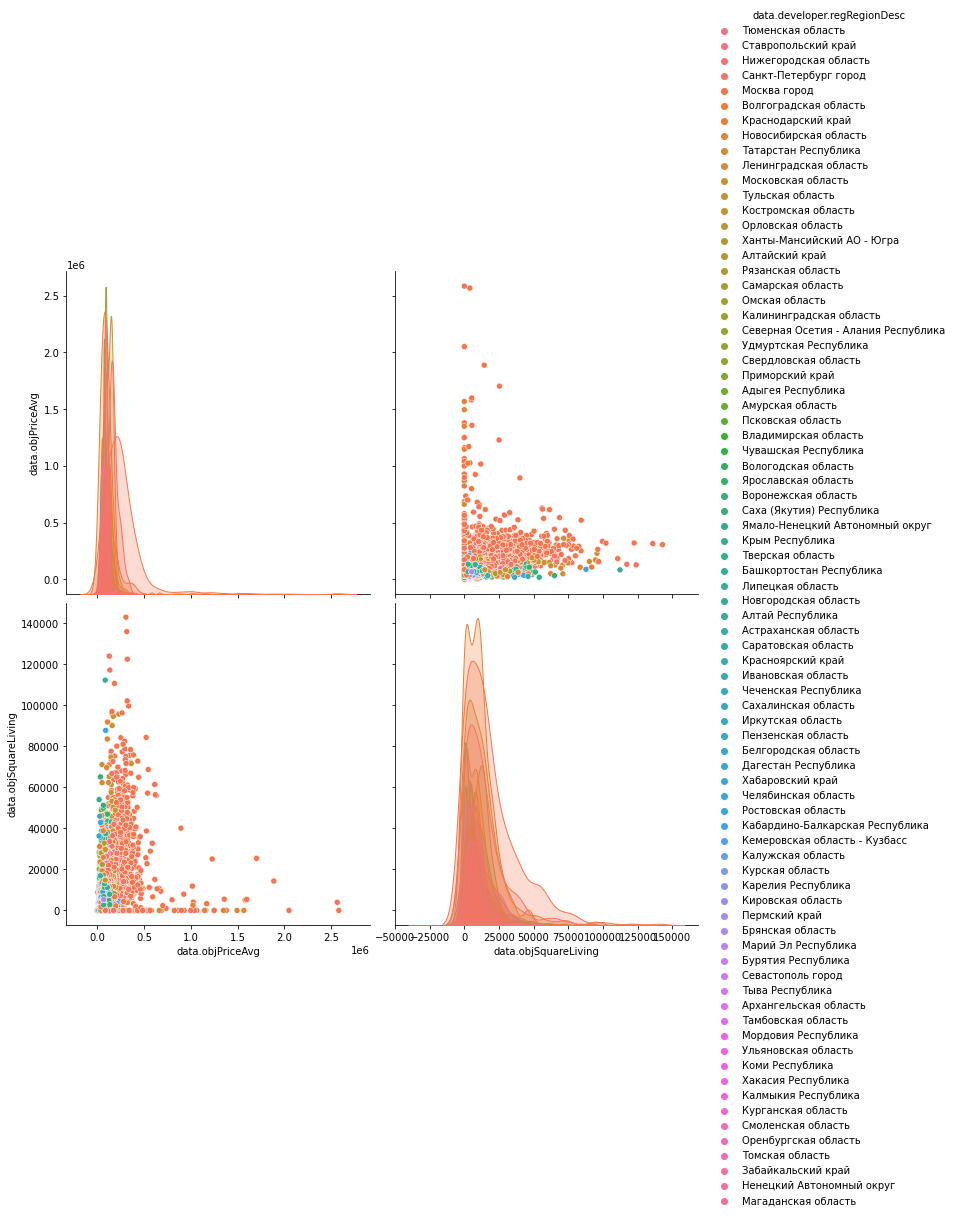

In [4]:
import seaborn as sns
sns.pairplot(vars=["data.objPriceAvg", "data.objSquareLiving"], data=dff_copy, hue="data.developer.regRegionDesc", height=5)
#Попытка взглянуть на стоимость жилья и объем вводимой площади. Очень интересно, но не очень понятно

<AxesSubplot:ylabel='data.developer.regRegionDesc'>

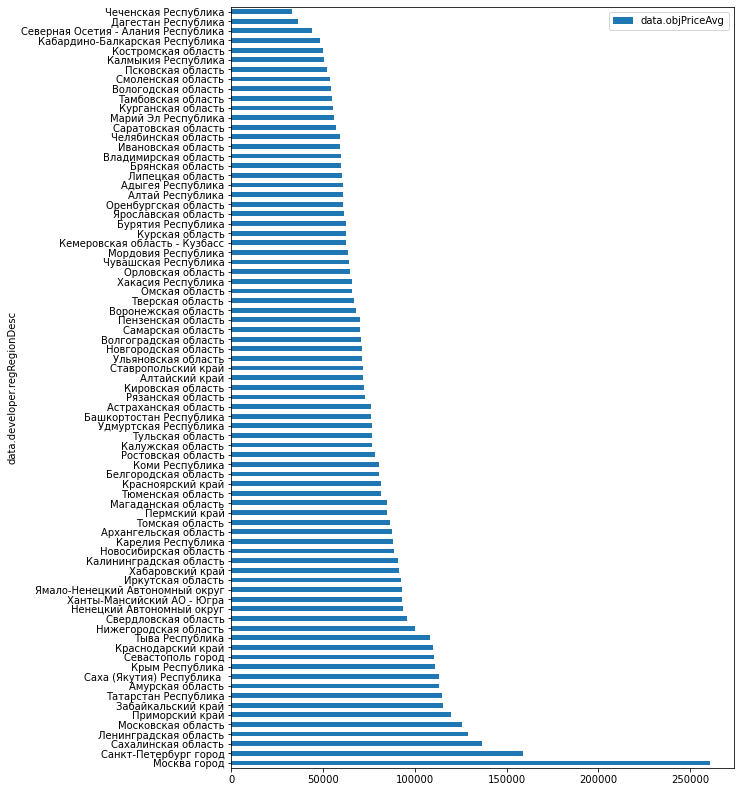

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,14
price_mean = dff_copy.groupby('data.developer.regRegionDesc')[['data.objPriceAvg']].mean()
price_mean.sort_values(by=['data.objPriceAvg'], ascending=False).plot(kind='barh')
#Картина по стоимости жилья в регионах. В топ-3 неожиданно Сахалинская область. В боттом-3 традиционно недорогое жилье на Кавказе.

<AxesSubplot:ylabel='data.developer.regRegionDesc'>

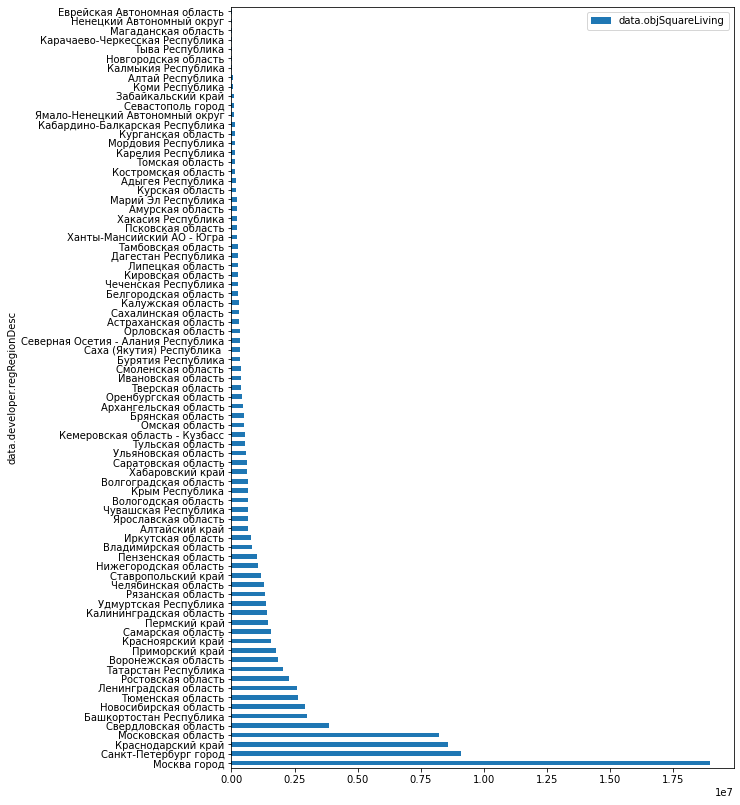

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,14
square_sum = dff.groupby('data.developer.regRegionDesc')[['data.objSquareLiving']].sum()
square_sum.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh')
#Картина общих объемов строящегося жилья. Краснодарский край строит объемы на уровне столичных регионов

<AxesSubplot:ylabel='data.objReady100PercDt'>

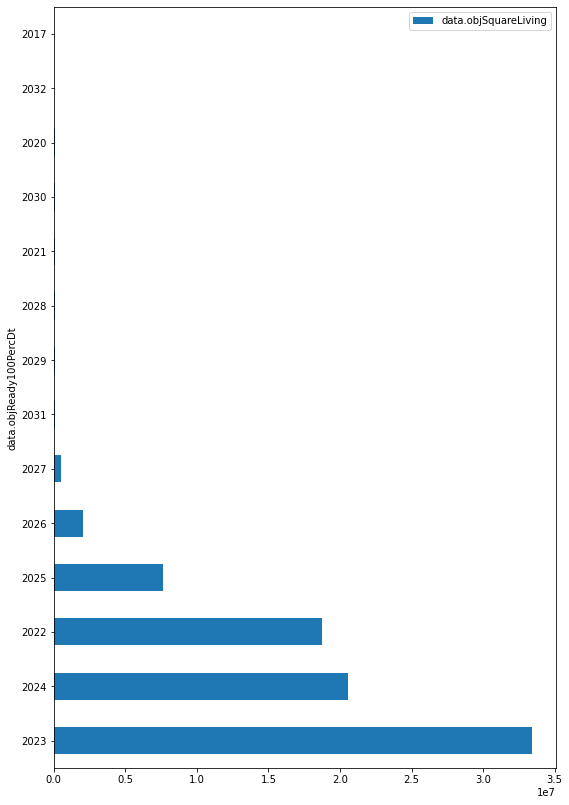

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,14
dff['data.objReady100PercDt'] = dff['data.objReady100PercDt'].str[:4]
square_sum = dff.groupby('data.objReady100PercDt')[['data.objSquareLiving']].sum()
square_sum.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh')
#2023 - год с максимальным количеством вводимого жилья

<AxesSubplot:ylabel='data.developer.regRegionDesc'>

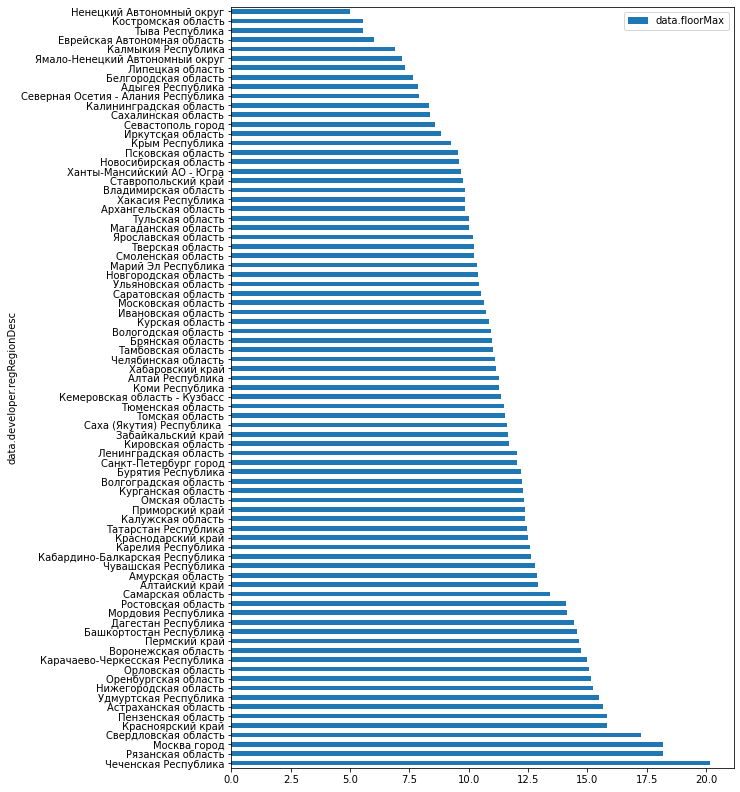

In [26]:
floor_mean = dff.groupby('data.developer.regRegionDesc')[['data.floorMax']].mean()
floor_mean.sort_values(by=['data.floorMax'], ascending=False).plot(kind='barh')
#Чеченская республика - лидер высотного жилья(за счет того что строят немного, но высоко). Москва - на уровне с Рязанской областью. Регионы Севера (Ямал, Ненецкий, ХМАО, Сахалин) широко представлены в списке малоэтажной застройки.

<AxesSubplot:ylabel='data.developer.regRegionDesc'>

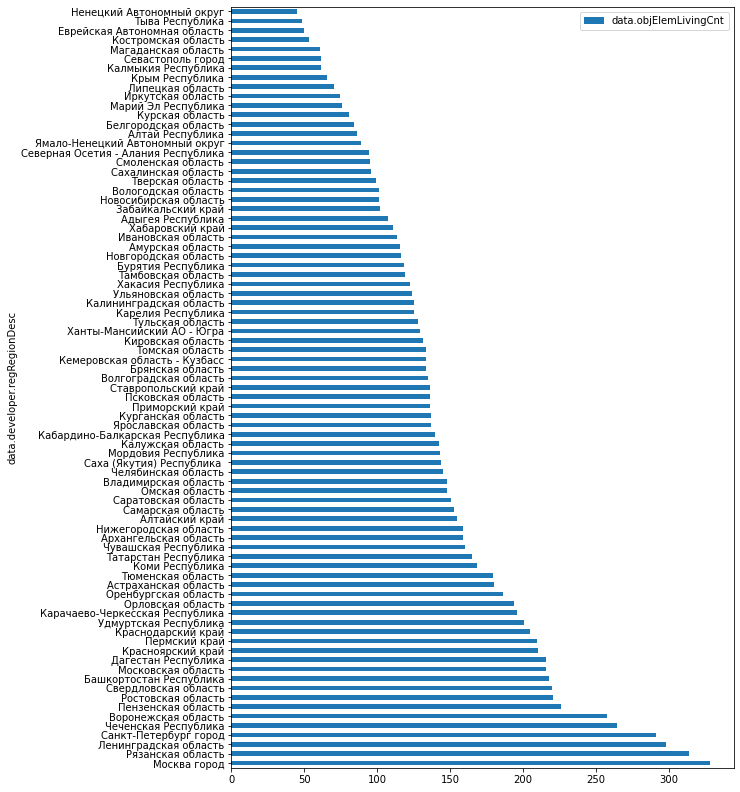

In [28]:
flat_mean = dff.groupby('data.developer.regRegionDesc')[['data.objElemLivingCnt']].mean()
flat_mean.sort_values(by=['data.objElemLivingCnt'], ascending=False).plot(kind='barh')
#Чеченская республика в лидерах по среднему количеству квартир (снова за счет того что строят немного но высоко). Регионы с небольшим количеством населения строят невысокие и немногоквартирные дома

<AxesSubplot:ylabel='data.developer.regRegionDesc'>

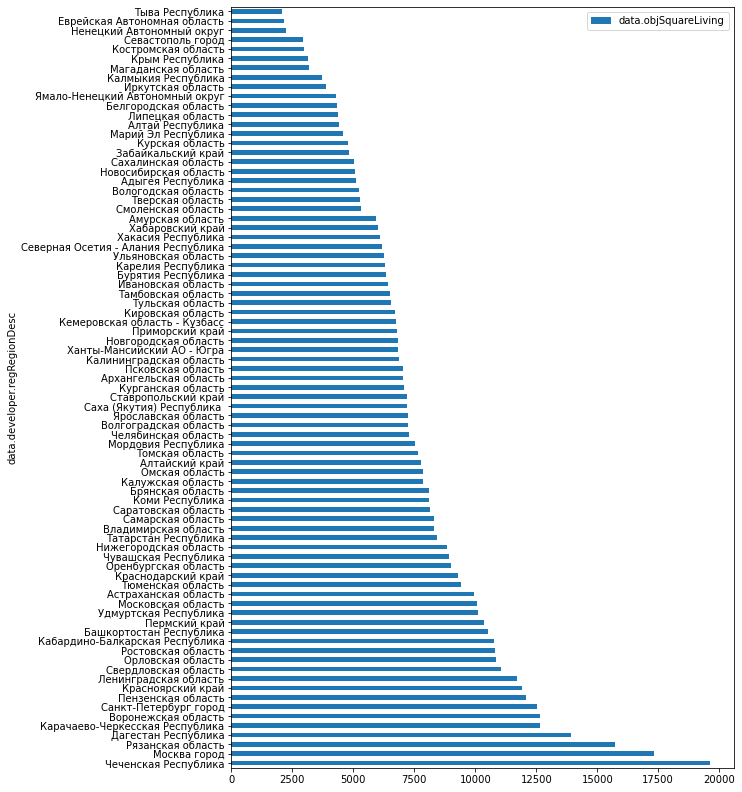

In [29]:
flat_mean = dff.groupby('data.developer.regRegionDesc')[['data.objSquareLiving']].mean()
flat_mean.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh')
#Кавказ в лидерах по жилой площади (Чечня, Дагестан, КЧР). Небогатые республики (Тыва, ЕАО, Магадан) - довольствуются небольшими площадями.

<AxesSubplot:ylabel='data.developer.regRegionDesc'>

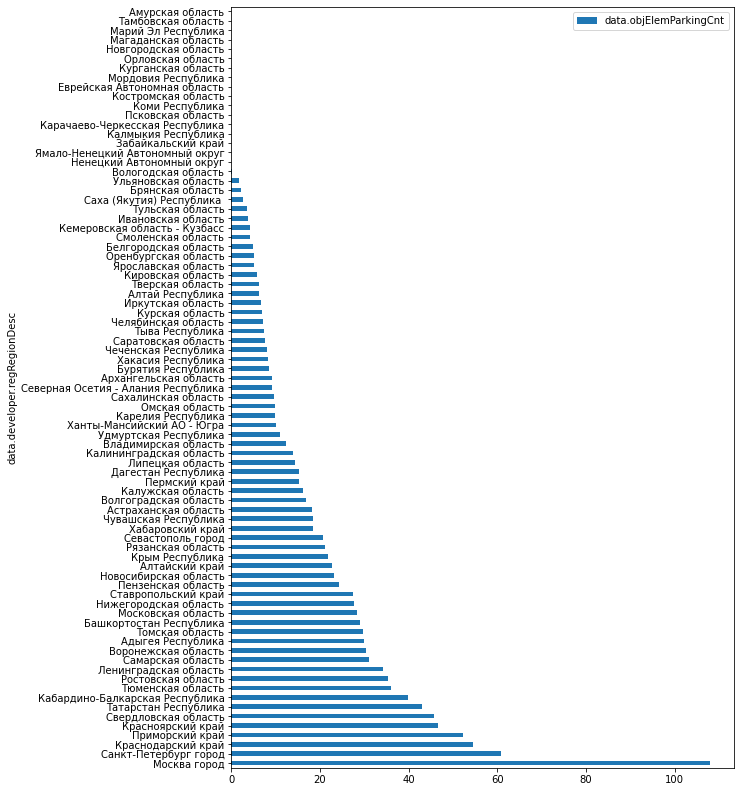

In [30]:
flat_mean = dff.groupby('data.developer.regRegionDesc')[['data.objElemParkingCnt']].mean()
flat_mean.sort_values(by=['data.objElemParkingCnt'], ascending=False).plot(kind='barh')
#Москва - лидер по парковкам. При этом регионы Кавказа в лидерах не представлены (кроме КБР), видимо нет потребности в парковках. Интересно, что есть регионы, где вообще строят без парковочных мест.

<AxesSubplot:ylabel='data.developer.devFullCleanNm'>

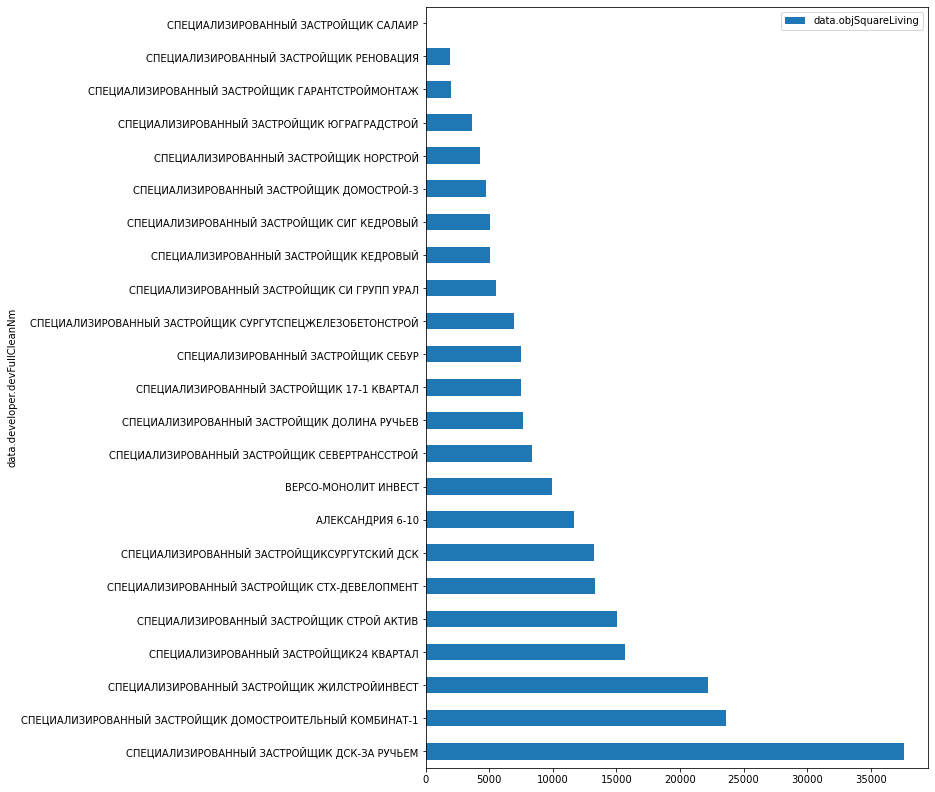

In [33]:
dfhm = dff.loc[dff['data.developer.regRegionDesc'] == 'Ханты-Мансийский АО - Югра']
dev_sum = dfhm.groupby('data.developer.devFullCleanNm')[['data.objSquareLiving']].sum()
dev_sum.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh')
#Топ застройщиков в ХМАО

<AxesSubplot:ylabel='data.wallMaterialShortDesc'>

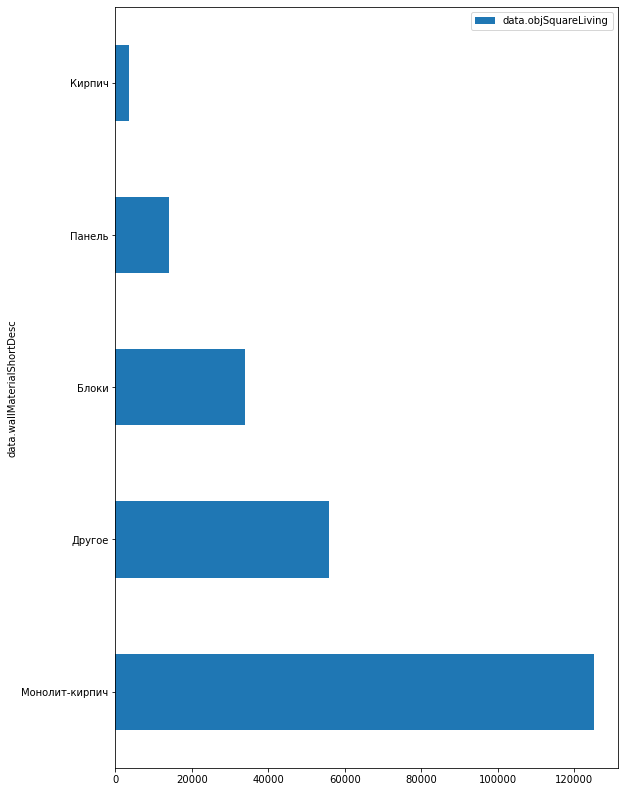

In [37]:
mat_sum = dfhm.groupby('data.wallMaterialShortDesc')[['data.objSquareLiving']].sum()
mat_sum.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh')
#из каких материалов строят в ХМАО

<AxesSubplot:ylabel='data.objLkFinishTypeDesc'>

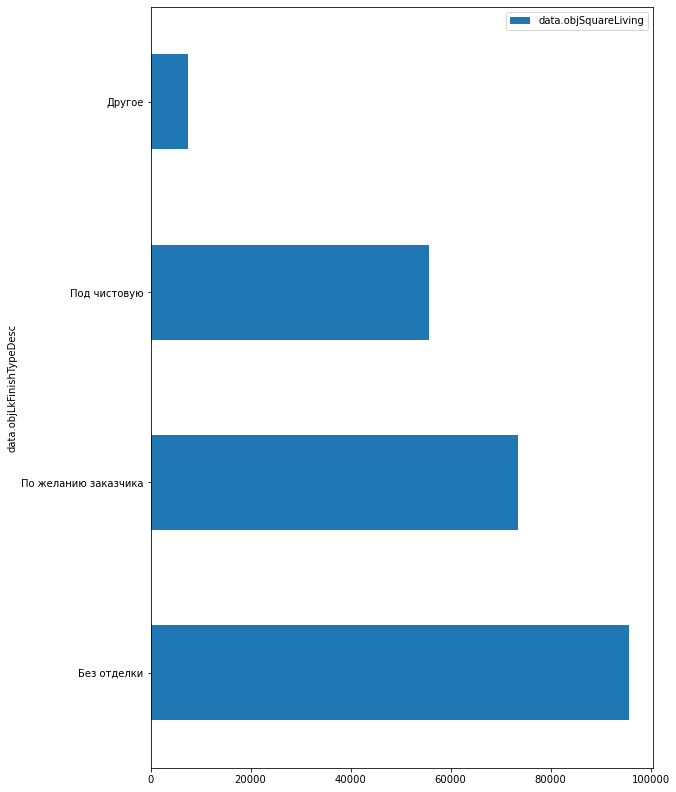

In [40]:
typ_sum = dfhm.groupby('data.objLkFinishTypeDesc')[['data.objSquareLiving']].sum()
typ_sum.sort_values(by=['data.objSquareLiving'], ascending=False).plot(kind='barh')
#под какую отделку отдают дома в ХМАО